In [1]:
%reset

import numpy as np
import pickle as pk
import matplotlib
import matplotlib.pyplot as pl
from astropy import units
from astropy import constants
# import matplotlib
from astropy.io import fits
import sys, os
import dill
# %pylab inline

# Color = ['#0072b1','#009d73','#d45e00','k', 'grey','yellow']

Color = ['k', '#000075', '#a9a9a9','#9A6324', '#808000','#aaffc3', '#fffac8'  ,'#800000', '#ffd8b1',]


font = {'size'   : 18}
matplotlib.rc('font', **font)
# # Latex stuff
pl.rc('text', usetex=True)
pl.rc('font', family='serif')

# %matplotlib inline





Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


In [2]:
ldir = '/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/results/'
f_zev1 = np.load(ldir + 'HOD_test_zevb1.npz')
f_zev3 = np.load(ldir + 'HOD_test_zevb3.npz')
f_zev5 = np.load(ldir + 'HOD_test_zevb5.npz')

f_zf1 = np.load(ldir + 'HOD_test_zfixb1.npz')
f_zf3 = np.load(ldir + 'HOD_test_zfixb3.npz')
f_zf5 = np.load(ldir + 'HOD_test_zfixb5.npz')




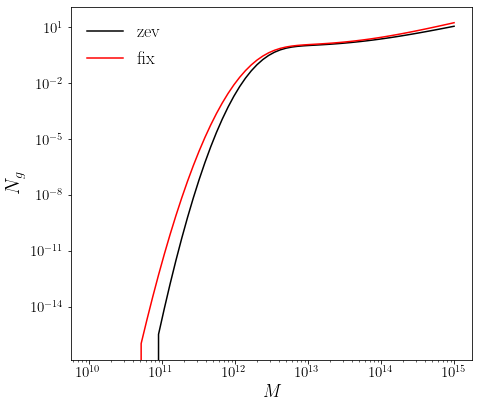

In [20]:

fig, ax = pl.subplots(1,1, figsize = (7,6))
ind = 30
ax.errorbar(f_zev5['M'][ind,:],f_zev5['Ntot'][ind,:],label=r'zev',ls='-',marker='',elinewidth=2.0,color='black')
ax.errorbar(f_zf5['M'][ind,:],f_zf5['Ntot'][ind,:],label=r'fix',ls='-',marker='',elinewidth=2.0,color='red')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(r'$M$', size = 18)
ax.set_ylabel(r'$N_g$', size = 20)
# ax.set_ylim(1e-5,3e4)
# ax.set_xlim(0.0,1.0)
ax.tick_params(axis='both', which='major', labelsize=15)
ax.tick_params(axis='both', which='minor', labelsize=15)
ax.legend(fontsize = 18, frameon = False)
pl.tight_layout()




In [3]:
neff = np.array([0.1498,0.1073,0.1091,0.1459,0.1063,0.1003])
arcmin2rad = (np.pi/180.)*(1./60.)
neff * (arcmin2rad**-2)



array([1770351.80843433, 1268082.43688254, 1289355.02203061,
       1724261.20728017, 1256264.33402249, 1185355.71686224])

In [4]:
neffr = np.array([0.022141, 0.038319, 0.058504, 0.029654, 0.025298])
neffr * (arcmin2rad**-2)


array([261664.6154242 , 452857.88349396, 691406.28972391, 350454.02221169,
       298974.36615335])

In [11]:
save_dir = '/global/project/projectdirs/des/shivamp/cosmosis/ACTxDESY3/src/results/'
cat_tocorr = 'maglim'
do_jk = True
njk = 150
put_weights_datapoints = False
nside_ymap = 4096
mask_type = 'act'
minz_all = np.array([0.20, 0.40, 0.55, 0.7, 0.85, 0.95])
maxz_all = np.array([0.40, 0.55, 0.7, 0.85, 0.95, 1.05 ])
do_gg = 1
labels = ['Bin1', 'Bin2', 'Bin3', 'Bin4','Bin5', 'Bin6']

linestyles = ['-.','-','--',':','-.','-','--']

factor = 1.



filenames = []
for j in range(len(minz_all)):
    minz = minz_all[j]
    maxz = maxz_all[j]
    file_suffix_save = '_cat_' + str(cat_tocorr) + '_z_' + str(minz) + '_' + str(maxz) + '_' + 'dojk_' + str(do_jk) + '_njk_' + str(njk)  + '_' + 'desy3' + '_w' + str(int(put_weights_datapoints)) + '_beam' + str(2.4)   

    if do_gg:
        filename = save_dir + 'dy/dy_dd_' + 'MICEy'  + '_' + 'nobeam' + '_nside' + str(nside_ymap) + '_mask_' + str(mask_type) + '_' + file_suffix_save + '_ns4096.pk'
    else:
        filename = save_dir + 'dy/dy_' + 'MICEy'  + '_' + 'nobeam' + '_nside' + str(nside_ymap) + '_mask_' + str(mask_type) + '_' + file_suffix_save + '_ns4096.pk'
    filenames.append(filename)




    

In [11]:
import sys, os
import dill
os.environ['COSMOSIS_SRC_DIR'] = '/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/'
sys.path.insert(0, '/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/cosmosis_code/')
DV = dill.load(open('/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/results/DV_obj_temp_all_MICE_maglim_gg_gy_zevhod_bf_az2.pk','rb'))   




In [12]:
df = fits.open('/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/data/Maglim_ACT_MICE_actarea_theorycov_corrnbar.fits')  

nbins = 6
bins1 = np.array([1,2,3,4,5,6])
bins2 = np.array([1,2,3,4,5,6])

texts_gg = []
for j1 in range(len(bins1)):
    texts_gg.append(str(bins1[j1]) + ',' + str(bins2[j1]))
texts_gy = [r'1,y',r'2,y',r'3,y',r'4,y',r'5,y',r'6,y']



In [13]:
df['COVMAT'].shape


(312, 312)

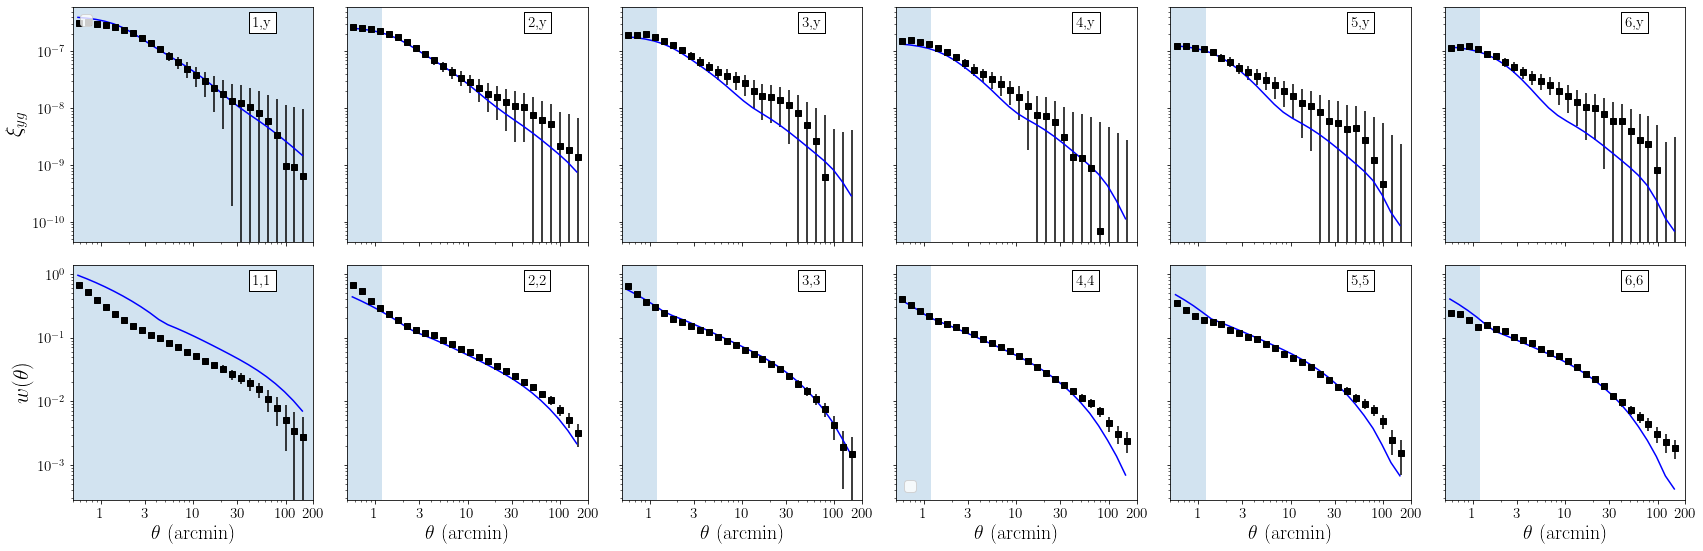

In [14]:
# from twobessel import *
import matplotlib.pyplot as plt
import scipy.interpolate as interpolate
def QR_inverse(matrix):
    _Q,_R = np.linalg.qr(matrix)
    return np.dot(_Q,np.linalg.inv(_R.T))

import pickle as pk
import numpy as np


from astropy.io import fits

fig, ax = pl.subplots(2,nbins, figsize = (24,8),sharex=True,sharey='row')
jc = 0

theta_arr = DV.xi_result_dict['gg']['theta']
sc_min = [0,0,0,0,0,0]
sc_max = [250,1.2,1.2,1.2,1.2,1.2]

for j1 in range(2):    
    for j2 in range(nbins):
        
        bin1 = df['wtheta'].data['BIN1']
        bin2 = df['wtheta'].data['BIN2']
        ind_sel = np.where((bin1 == bins1[j2]) & (bin2 == bins2[j2]))[0]
        if len(ind_sel) == 0:
            ind_sel = np.where((bin1 == bins2[j2]) & (bin2 == bins1[j2]))[0]
        ind_sel1 = np.where((bin1 == bins1[j2]))[0]
        ind_sel2 = np.where((bin2 == bins2[j2]))[0]
        
        
        bin1y = df['compton_galaxy'].data['BIN1']
        bin2y = df['compton_galaxy'].data['BIN2']
        ind_sely = np.where((bin1y == bins1[j2]) & (bin2y == bins2[j2]))[0]
        
        bin_str = 'bin_' + str(j2+1) + '_' + str(j2+1)
        bin_stry = 'bin_' + str(j2+1) + '_' + str(0)

        if j1 == 0:

            yk_th_g = df['compton_galaxy'].data['ANG'][ind_sely]
            yk_th_val = df['compton_galaxy'].data['VALUE'][ind_sely]
            yk_err = np.sqrt(np.diag(df['COVMAT'].data[156:,156:][ind_sely,:][:,ind_sely]))
            
            Cl_j1_tot = DV.xi_result_dict['gy'][bin_stry]['tot']
            
            ax[j1,j2].errorbar(yk_th_g,yk_th_val, yk_err, ls='',marker='s',color='k')
            ax[j1,j2].plot(theta_arr,Cl_j1_tot,ls='-',color='blue')
            
#             ax[j1,j2].set_ylim(6e-12,6e-11)
            
            
            
        if j1 == 1:
            
            yk_th_g = df['wtheta'].data['ANG'][ind_sel]
            yk_th_val = df['wtheta'].data['VALUE'][ind_sel]
            yk_err = np.sqrt(np.diag(df['COVMAT'].data[:156,:156][ind_sel,:][:,ind_sel]))
            
            Cl_j1_tot = DV.xi_result_dict['gg'][bin_str]['tot']
            
            ax[j1,j2].errorbar(yk_th_g,yk_th_val, yk_err, ls='',marker='s',color='k')
            ax[j1,j2].plot(theta_arr,Cl_j1_tot,ls='-',color='blue')

#             ax[j1,j2].set_ylim(1e-7,1e-4)



#         ax[j1,j2].set_ylim(0.5,4.2)
#         ax[j1,j2].axhline(1.0,ls='--',color='k')    
#             
        ax[j1,j2].set_xscale('log')
#         if j1 == 1:
        ax[j1,j2].set_yscale('log')
        
        if j1 == 1:
            ax[j1,j2].set_xlabel(r'$\theta$ (arcmin)', size = 20)
            ticks  = np.array([1,3,10,30,100,200])
            labels_bottom = ticks
            ax[0,j2].set_xticks(ticks)
            ax[0,j2].set_xticklabels(labels_bottom,  fontsize=15)
            ax[1,j2].set_xticks(ticks)
            ax[1,j2].set_xticklabels(labels_bottom,  fontsize=15)
            
        ax[j1,j2].tick_params(axis='both', which='minor', labelsize=15)    
        ax[j1,j2].tick_params(axis='both', which='major', labelsize=15)
#         ax[0,0].legend(fontsize = 18, frameon = False)
        ax[j1,j2].axvspan(sc_min[j2],sc_max[j2],alpha=0.2)
        ax[j1,j2].set_xlim((0.5,200))
        

#         ax[j1,j2].text( 0.55, 0.96,labels[jc], verticalalignment='top', horizontalalignment='left', transform=ax[j1,j2].transAxes, fontsize=15)
        ax[0,j2].text( 0.75, 0.96,texts_gy[j2], verticalalignment='top', horizontalalignment='left', transform=ax[0,j2].transAxes, fontsize=15, bbox=dict(facecolor='white', edgecolor='black'))    
        ax[1,j2].text( 0.75, 0.96,texts_gg[j2], verticalalignment='top', horizontalalignment='left', transform=ax[1,j2].transAxes, fontsize=15, bbox=dict(facecolor='white', edgecolor='black'))    
#         ax[2,j2].text( 0.75, 0.96,texts_kk[j2], verticalalignment='top', horizontalalignment='left', transform=ax[2,j2].transAxes, fontsize=15, bbox=dict(facecolor='white', edgecolor='black'))


        jc += 1

# yticks  = np.array([-0.45,-0.3,-0.15,0.00,0.15,0.3,0.45])
# labels_bottom = yticks
# ax[0,0].set_yticks(yticks)
# ax[0,0].set_yticklabels(labels_bottom,  fontsize=15)
# ax[1,0].set_yticks(yticks)
# ax[1,0].set_yticklabels(labels_bottom,  fontsize=15)



# ax[0,0].set_ylabel(r'$\xi_{\rm mm}$ comparison', size = 22)
ax[0,0].set_ylabel(r'$\xi_{yg}$ ', size = 22)
# ax[1,0].set_ylabel(r'$\xi_{y\kappa}(\theta)$ ', size = 22)
ax[1,0].set_ylabel(r'$w(\theta)$ ', size = 22)
ax[1,3].legend(fontsize=15,loc='lower left')
ax[0,0].legend(fontsize=15,loc='upper left')
#     ax[1,j].tick_params(axis='both', which='major', labelsize=15)






pl.tight_layout()

# fig.savefig('xi_ygt_kk_allbins_sigma_comp.pdf')










In [27]:
2.* 192/(220-14)


1.8640776699029127

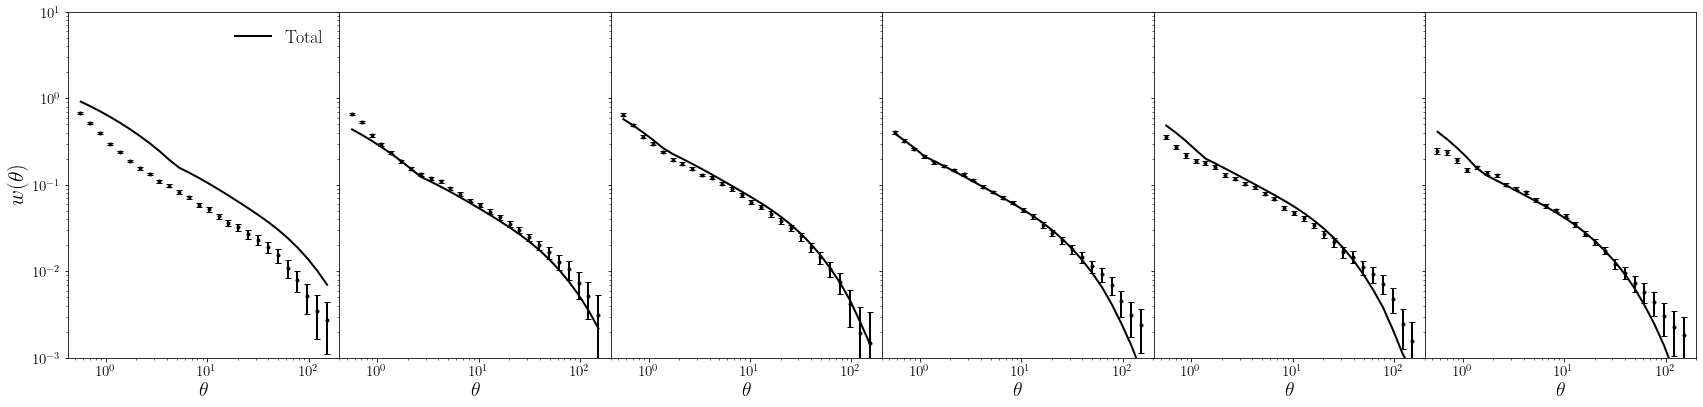

In [13]:
nbins = 6
fig, ax = pl.subplots(1,nbins, figsize = (nbins*4,6),sharey=True,sharex=True, gridspec_kw = {'wspace':0.0, 'hspace':0.0})
jc = 0
# bins = 4
binl = 1
xi_dytruth_sig_all = []
theta_array = DV.xi_result_dict['gg']['theta']
for j1 in range(nbins):        
#     sel_ind = np.where((bin1_wt == j1+1) & (bin2_wt == j1+1))[0]
    bin_str = 'bin_' + str(j1+1) + '_' + str(j1+1)
    
#     Cl_j1_1h = DV.xi_result_dict['gg'][bin_str]['1h']
#     Cl_j1_2h = DV.xi_result_dict['gg'][bin_str]['2h']
    Cl_j1_tot = DV.xi_result_dict['gg'][bin_str]['tot']
#     Cl_j1_tot2 = DV.xi_result_dict['gg'][bin_str]['tot2']

#     ax[j1].errorbar(theta_array, Cl_j1_1h, linestyle='-', marker='',lw = 2, color ='blue',label='1h')
#     ax[j1].errorbar(theta_array, Cl_j1_2h, linestyle='-', marker='',lw = 2, color ='red',label='2h Linear')
#     ax[j1].errorbar(theta_array, Cl_j1_1h + Cl_j1_2h, linestyle='-', marker='',lw = 2, color ='green',label='Total')  
#     print(np.where(Cl_j1_1h > Cl_j1_2h)[0])
#     ind_gt = np.where(Cl_j1_1h > Cl_j1_2h)[0]
#     Cl_j1_tot = np.hstack((Cl_j1_1h[:ind_gt[-1]+1] , Cl_j1_2h[ind_gt[-1]+1:]))
#     print(Cl_j1_tot.shape)
#     print(theta_array.shape)
    ax[j1].errorbar(theta_array, Cl_j1_tot, linestyle='-', marker='',lw = 2, color ='k',label='Total') 
    
    
#     ax[j1].errorbar(wt_ang[sel_ind], wt_csf[sel_ind], linestyle='-', marker='',lw = 2, color ='red',label='Cosmosis Halofit')  
    text = 'bin lens = ' + str(j1+1) + '\n' + 'bin source = ' + str(j1+1)
#     ax[j1].text( 0.1, 0.96,text, verticalalignment='top', horizontalalignment='left', transform=ax[j1].transAxes, fontsize=15)    

    filename = filenames[j1]
    try:
        haloydata = pk.load(open(filename, "rb"))
    except:
        haloydata = pk.load(open(filename, "rb"),encoding='latin1')

    ggcorr = haloydata['xi_gg_full']
    
    dytruth = haloydata['dytruth']
    randytruth = haloydata['randytruth']

    xi_dytruth = dytruth.xi - randytruth.xi

    if haloydata['do_jk']:
        njk = haloydata['njk']


        xi_dytruth_big_all = haloydata['xi_dytruth_big_all']
        xi_randytruth_big_all = haloydata['xi_randytruth_big_all']
        xi_dytruth_all= (xi_dytruth_big_all-xi_randytruth_big_all)
        xi_dytruth_mean = np.tile(np.mean(xi_dytruth_all,axis=0),(njk,1))
        xi_dytruth_sigma = np.sqrt((1.0*(njk-1.)/njk)*(np.sum(np.square(xi_dytruth_all - xi_dytruth_mean),axis=0)))



    rgg = haloydata['r_gg']
    sig_gg = haloydata['sig']

    xi_dytruth_sig_all.append(xi_dytruth_sigma)

    ax[j1].errorbar(rgg, ggcorr,sig_gg, linestyle='None', capsize=3, lw = 2,marker='.', color ='black')



    ax[j1].set_yscale('log')
    ax[j1].set_xscale('log')
    ax[j1].set_xlabel(r'$\theta$', size = 20)
    
    ax[j1].tick_params(axis='both', which='minor', labelsize=15)    
    ax[j1].tick_params(axis='both', which='major', labelsize=15)
ax[0].legend(fontsize = 18, frameon = False)
ax[0].set_ylim(1e-3,1e1)
ax[0].set_ylabel(r'$w(\theta)$', size = 22)
pl.tight_layout()

# fig.savefig('xi_gg_compare_maglim_allbins.pdf')







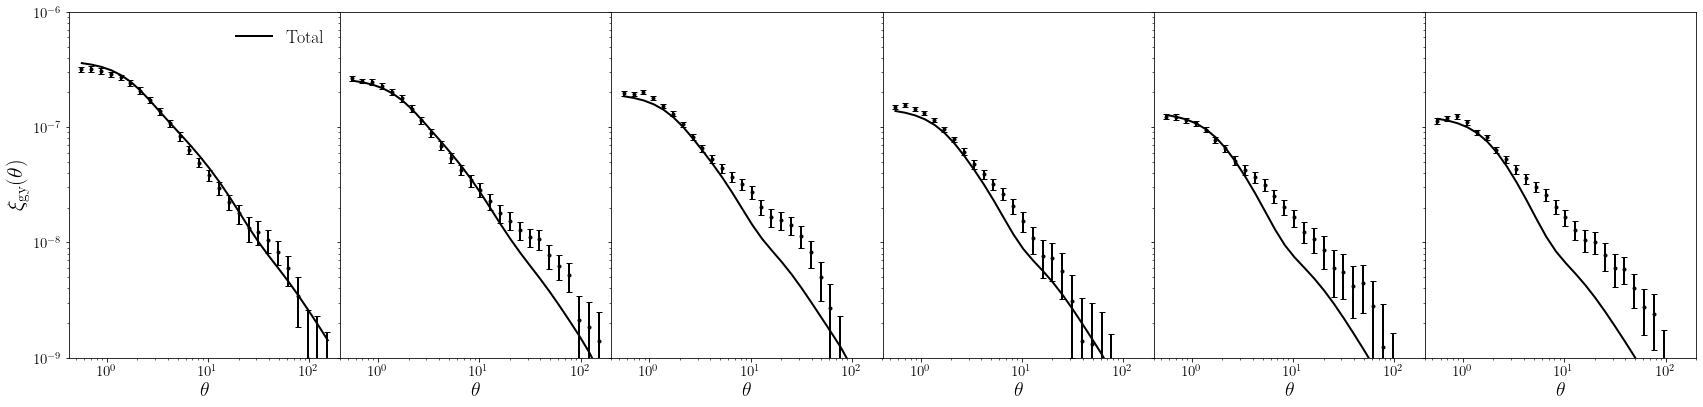

In [14]:
nbins = 6
fig, ax = pl.subplots(1,nbins, figsize = (nbins*4,6),sharey=True,sharex=True, gridspec_kw = {'wspace':0.0, 'hspace':0.0})
jc = 0
# bins = 4
binl = 1

theta_array = DV.xi_result_dict['gg']['theta']
for j1 in range(nbins):        
    bin_str = 'bin_' + str(j1+1) + '_' + str(0)
    
#     Cl_j1_1h = DV.xi_result_dict['gy'][bin_str]['1h']
#     Cl_j1_2h = DV.xi_result_dict['gy'][bin_str]['2h']
    Cl_j1_tot = DV.xi_result_dict['gy'][bin_str]['tot']
#     Cl_j1_tot2 = DV.xi_result_dict['gy'][bin_str]['tot2']

#     ax[j1].errorbar(theta_array, Cl_j1_1h, linestyle='-', marker='',lw = 2, color ='blue',label='1h')
#     ax[j1].errorbar(theta_array, Cl_j1_2h, linestyle='-', marker='',lw = 2, color ='red',label='2h Linear')
#     ax[j1].errorbar(theta_array, Cl_j1_1h + Cl_j1_2h, linestyle='-', marker='',lw = 2, color ='green',label='Total')  
    ax[j1].errorbar(theta_array, Cl_j1_tot, linestyle='-', marker='',lw = 2, color ='k',label='Total')  
    
#     ax[j1].errorbar(gt_ang[sel_ind], gt_csf[sel_ind], linestyle='', marker='o',lw = 2, color ='black',label='Cosmosis Halofit')  
    text = 'bin lens = ' + str(j1+1) + '\n' + 'bin source = ' + str(j1+1)
#     ax[j1].text( 0.1, 0.96,text, verticalalignment='top', horizontalalignment='left', transform=ax[j1].transAxes, fontsize=15)    

    filename = filenames[j1]
    try:
        haloydata = pk.load(open(filename, "rb"))
    except:
        haloydata = pk.load(open(filename, "rb"),encoding='latin1')

    dytruth = haloydata['dytruth']
    randytruth = haloydata['randytruth']

    xi_dytruth = dytruth.xi - randytruth.xi

    if haloydata['do_jk']:
        njk = haloydata['njk']


        xi_dytruth_big_all = haloydata['xi_dytruth_big_all']
        xi_randytruth_big_all = haloydata['xi_randytruth_big_all']
        xi_dytruth_all= (xi_dytruth_big_all-xi_randytruth_big_all)
        xi_dytruth_mean = np.tile(np.mean(xi_dytruth_all,axis=0),(njk,1))
        xi_dytruth_sigma = np.sqrt((1.0*(njk-1.)/njk)*(np.sum(np.square(xi_dytruth_all - xi_dytruth_mean),axis=0)))


    ax[j1].errorbar(np.exp(dytruth.logr), xi_dytruth, yerr=xi_dytruth_sigma, linestyle='', capsize=3, lw = 2, color ='k',marker='.')  
    ax[j1].set_yscale('log')
    ax[j1].set_xscale('log')
    ax[j1].set_xlabel(r'$\theta$', size = 20)
    
    ax[j1].tick_params(axis='both', which='minor', labelsize=15)    
    ax[j1].tick_params(axis='both', which='major', labelsize=15)
ax[0].legend(fontsize = 18, frameon = False)
ax[0].set_ylim(1e-9,1e-6)
ax[0].set_ylabel(r'$\xi_{\rm gy}(\theta)$', size = 22)
pl.tight_layout()

# fig.savefig('xi_gg_compare_maglim_allbins.pdf')







In [11]:
twoptf = fits.open('/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/results/Maglim_ACT_MICE_actarea_theorycov_corrnbar.fits') 
covf = twoptf['COVMAT'].data



In [12]:
twoptf.info()


Filename: /global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/results/Maglim_ACT_MICE_actarea_theorycov_corrnbar.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1  COVMAT        1 ImageHDU        13   (312, 312)   float64   
  2  wtheta        1 BinTableHDU     29   156R x 5C   [K, K, K, D, D]   
  3  compton_galaxy    1 BinTableHDU     29   156R x 5C   [K, K, K, D, D]   
  4  nz_source     1 BinTableHDU     24   300R x 7C   [D, D, D, D, D, D, D]   
  5  nz_lens       1 BinTableHDU     28   101R x 9C   [D, D, D, D, D, D, D, D, D]   


Text(0.5, 1.0, '$\\mathcal{C}(\\langle \\gamma_t y \\rangle,\\langle \\gamma_t y \\rangle)$')

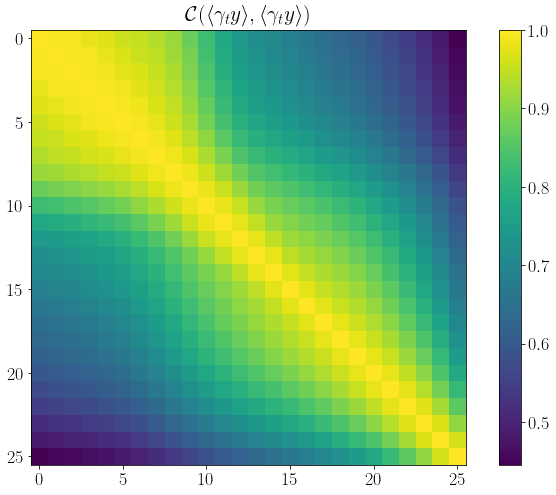

In [13]:
def get_corr(cov):
    corr = np.zeros(cov.shape)
    for ii in range(0, cov.shape[0]):
        for jj in range(0, cov.shape[1]):
            corr[ii, jj] = cov[ii, jj] / np.sqrt(cov[ii, ii] * cov[jj, jj])
    return corr

pl.figure( figsize = (12,8))
# pl.imshow(np.log(np.abs(twoptf['cov_total'])))
# pl.imshow(np.log(np.abs(covf)))
# pl.imshow(np.log(np.abs(covf[:,156:][156:,:])))
pl.imshow(get_corr((covf[:,156:182][156:182,:])))
# pl.imshow(get_corr(covf))

pl.colorbar()
pl.title(r'$\mathcal{C}(\langle \gamma_t y \rangle,\langle \gamma_t y \rangle)$')





In [19]:
tth = np.array([  0.5823474 ,   0.72831757,   0.91087637,   1.13919503,
         1.42474364,   1.78186737,   2.2285071 ,   2.78710075,
         3.48571051,   4.35943255,   5.45216021,   6.81878906,
         8.52797469,  10.66558176,  13.33899765,  16.68252725,
        20.86414007,  26.09390858,  32.63456162,  40.81468321,
        51.04521963,  63.84012424,  79.84217705,  99.85527615,
       124.88482334, 156.18823262])
ind_sel = np.where((tth > 1.2) & (tth < 158))[0]
binv = 6


In [14]:
# np.linalg.inv(covf)
cov_gy_th = (covf[:,156:][156:,:])



In [15]:
xi_dytruth_sig_all[1]/np.sqrt(np.diag(cov_gy_th)[26:52])




array([0.94495493, 0.80017335, 0.94995508, 0.94025039, 0.74963191,
       0.87699751, 0.74176184, 0.70889894, 0.63312553, 0.538734  ,
       0.46920871, 0.42470641, 0.41354126, 0.40448479, 0.36229031,
       0.32453494, 0.30131746, 0.25123248, 0.24022255, 0.25124093,
       0.22985903, 0.2146427 , 0.21446306, 0.20557682, 0.20503926,
       0.20020934])

In [10]:
sth = np.array([0.01028564, 0.00998105, 0.00893706, 0.00831762, 0.00772907,
       0.0071646 , 0.00670842, 0.00633698, 0.00603604, 0.00578613,
       0.00557824, 0.00540229, 0.00525325, 0.00512395, 0.00500895,
       0.00489983, 0.00478915, 0.0046681 , 0.0045311 , 0.0043732 ,
       0.00419148, 0.00398207, 0.00374466, 0.00348107, 0.00319607,
       0.00289818])

sjk = np.array([0.01559847, 0.01302874, 0.01091244, 0.00921145, 0.00686223, 0.00613625,
 0.00593191, 0.00501256, 0.0043427,  0.00389367, 0.00365398, 0.00350162,
 0.00320845, 0.00320608, 0.00300808, 0.00290314, 0.00298821, 0.00304894,
 0.00299243, 0.0028741,  0.00270925, 0.00246412, 0.00217038, 0.00196394,
 0.00183457, 0.00163907])




In [17]:
sjk/sth


array([1.51652887, 1.30534763, 1.22103242, 1.10746223, 0.88784679,
       0.85646791, 0.88424845, 0.79100139, 0.71946177, 0.67293165,
       0.65504173, 0.64817327, 0.61075525, 0.62570478, 0.60054103,
       0.59249811, 0.62395415, 0.65314368, 0.66042021, 0.65720754,
       0.64637073, 0.61880379, 0.57959334, 0.56417711, 0.57400808,
       0.56555148])

In [13]:


tjk = np.array([  0.5633768 ,   0.70459706,   0.88182839,   1.10385437,
         1.3796448 ,   1.72581867,   2.15887148,   2.69952035,
         3.37583774,   4.22225895,   5.28167912,   6.60571135,
         8.26213244,  10.33347794,  12.92444877,  16.16564437,
        20.21909909,  25.28867192,  31.62806706,  39.5578992 ,
        49.47548717,  61.87782291,  77.38677973,  96.78098172,
       121.03539191, 151.3609943 ])


In [19]:
len(tth)



26

In [15]:
np.log(tjk)[1:] - np.log(tjk)[:-1]


array([0.22367742, 0.22437137, 0.22456584, 0.22301805, 0.22387545,
       0.22388409, 0.22348849, 0.2235694 , 0.22372677, 0.22387378,
       0.22369057, 0.22374809, 0.22370619, 0.22373186, 0.2237675 ,
       0.22373938, 0.22372889, 0.22368838, 0.22372048, 0.22371194,
       0.2236845 , 0.22365412, 0.22363454, 0.22363249, 0.22358468])

In [2]:
import matplotlib
from getdist import plots, MCSamples
import numpy as np
import matplotlib.pyplot as pl
import matplotlib
import pdb

matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.unicode'] = True




/global/u1/s/spandey/self_module_ini/myenv3/lib/python3.7/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
  if __name__ == '__main__':


In [3]:
def get_nsample(filename):
    with open(filename,"r") as fi:
        for ln in fi:
            if ln.startswith("#nsample="):
                nsamples = int(ln[9:])
    return nsamples

def get_evidence(filename):
    with open(filename,"r") as fi:
        for ln in fi:
            if ln.startswith("#log_z="):
                logz = float(ln[7:])
    return logz

# def get_param_names(filename):
#     with open(filename,"r") as fi:
#         param_names = np.array((fi.readline()[1:].split())[:-4])
#     print param_names
#     return param_names


def get_param_names(filename):
    with open(filename,"r") as fi:
        param_names = np.array((fi.readline()[1:].split()))
#     print param_names
    return param_names


def get_S8(data, names, Omega_m_name = 'cosmological_parameters--omega_m', sigma_8_name = 'COSMOLOGICAL_PARAMETERS--SIGMA_8', alpha=0.5):
    output_names = []
    ind_data = []
    for ii in range(len(names)):
        if (names[ii] in [Omega_m_name]):
            Omega_m_ind = ii
        if (names[ii] in [sigma_8_name]):
            sig8_ind = ii
    sigma_8 = data[:,sig8_ind]
    omega_m = data[:,Omega_m_ind]
    s8 = sigma_8 * (omega_m/0.3)**alpha
    return s8


def get_Obh2(data, names, Omega_b_name = 'cosmological_parameters--omega_b', h_name = 'cosmological_parameters--h0'):
    output_names = []
    ind_data = []
    for ii in range(len(names)):
        if (names[ii] in [Omega_b_name]):
            Omega_b_ind = ii
        if (names[ii] in [h_name]):
            h_ind = ii
    h0 = data[:,h_ind]
    omega_b = data[:,Omega_b_ind]
    return omega_b * (h0**2)

def get_Omh3(data, names, Omega_m_name = 'cosmological_parameters--omega_m', h_name = 'cosmological_parameters--h0'):
    output_names = []
    ind_data = []
    for ii in range(len(names)):
        if (names[ii] in [Omega_m_name]):
            Omega_m_ind = ii
        if (names[ii] in [h_name]):
            h_ind = ii
    h0 = data[:,h_ind]
    omega_m = data[:,Omega_m_ind]
    return omega_m * (h0**3)

def replace_fancy(names, fancy_dic):
    output_names = []
    ind_data = []
    for ii in range(len(names)):
        if (names[ii] in fancy_dic):
            output_names.append(fancy_dic[names[ii]])
            ind_data.append(ii)
    return np.array(output_names), np.array(ind_data)


s8v = 0.82355 * (0.3/0.3)**0.5
marker_dict = {'cosmological_parameters--omega_m':0.3,'COSMOLOGICAL_PARAMETERS--SIGMA_8':0.82355,'cosmological_parameters--s8':s8v,'cosmological_parameters--omega_b':0.048,'cosmological_parameters--h0':0.69,'cosmological_parameters--n_s':0.97}    
stat_vars = ['cosmological_parameters--omega_m','COSMOLOGICAL_PARAMETERS--SIGMA_8','cosmological_parameters--s8']
def get_mean_std_tension(fname, param_names=stat_vars, truth_dict=marker_dict):
    sf_name = open(fname, 'r')
    lines_all = sf_name.readlines()
    lines = lines_all[3:]
    mean_std = {}
    for j1 in range(len(param_names)):
        for i1 in range(len(lines)):
            first_line = lines[i1]
            first_line_split = first_line.split()
            sec_var = first_line_split[0]
            if sec_var == param_names[j1]:
                mean_std[sec_var] = np.array([float(first_line_split[1]),float(first_line_split[2])])
    out_dic = {}
    for param in param_names:
        mean, std = mean_std[param][0],mean_std[param][1]
        tension = np.abs(mean - truth_dict[param])/std
        out_dic[param] = tension
    
    return mean_std,out_dic

def replace_fancy(names, fancy_dic):
    output_names = []
    ind_data = []
    for ii in range(len(names)):
        if (names[ii] in fancy_dic):
            output_names.append(fancy_dic[names[ii]])
            ind_data.append(ii)
    return np.array(output_names), np.array(ind_data)





[[ 1.50319037e+01  4.72394736e+00  6.05338089e-01  8.78016763e-01
   1.28854777e+01 -1.17071722e-01  4.44948832e+01 -8.90168836e-01
   5.24703973e+01 -9.25873610e+00  3.60090219e-01 -3.05103333e-01
   1.34922392e+01 -3.30695217e-02  1.06197238e+00  7.07640868e-01
  -2.39424244e+01 -1.91029459e+02 -2.14971883e+02  7.53453530e-04]]
382.058917713012
Removed no burn in
nsamp  =  4529
data shape =  (4529, 4)
weights shape =  (4529,)
param names =  ['theory_yx--p0-a_m--0' 'theory_yx--beta-a_m--0'
 'theory_yx--p0-alpha_z--0' 'theory_yx--beta-alpha_z--0']
param names fancy =  ['$P_0(A)$' '$\\beta(A)$' '$P_0(\\alpha_z)$' '$\\beta(\\alpha_z)$']
[[ 1.17411186e+01  4.80497120e+00 -2.62232305e-01 -1.87193469e-01
   1.28211603e+01 -1.30635460e-01  4.91311216e+01 -9.78453826e-01
   5.17011567e+01 -9.57442474e+00  1.21318837e-01  7.89224519e-01
   1.34868662e+01 -6.28956647e-02  1.06260761e+00  4.93883154e-01
  -2.42301065e+01 -1.88423356e+02 -2.12653463e+02  7.55180227e-04]]
376.8467126798633
Removed

<Figure size 2016x1512 with 0 Axes>

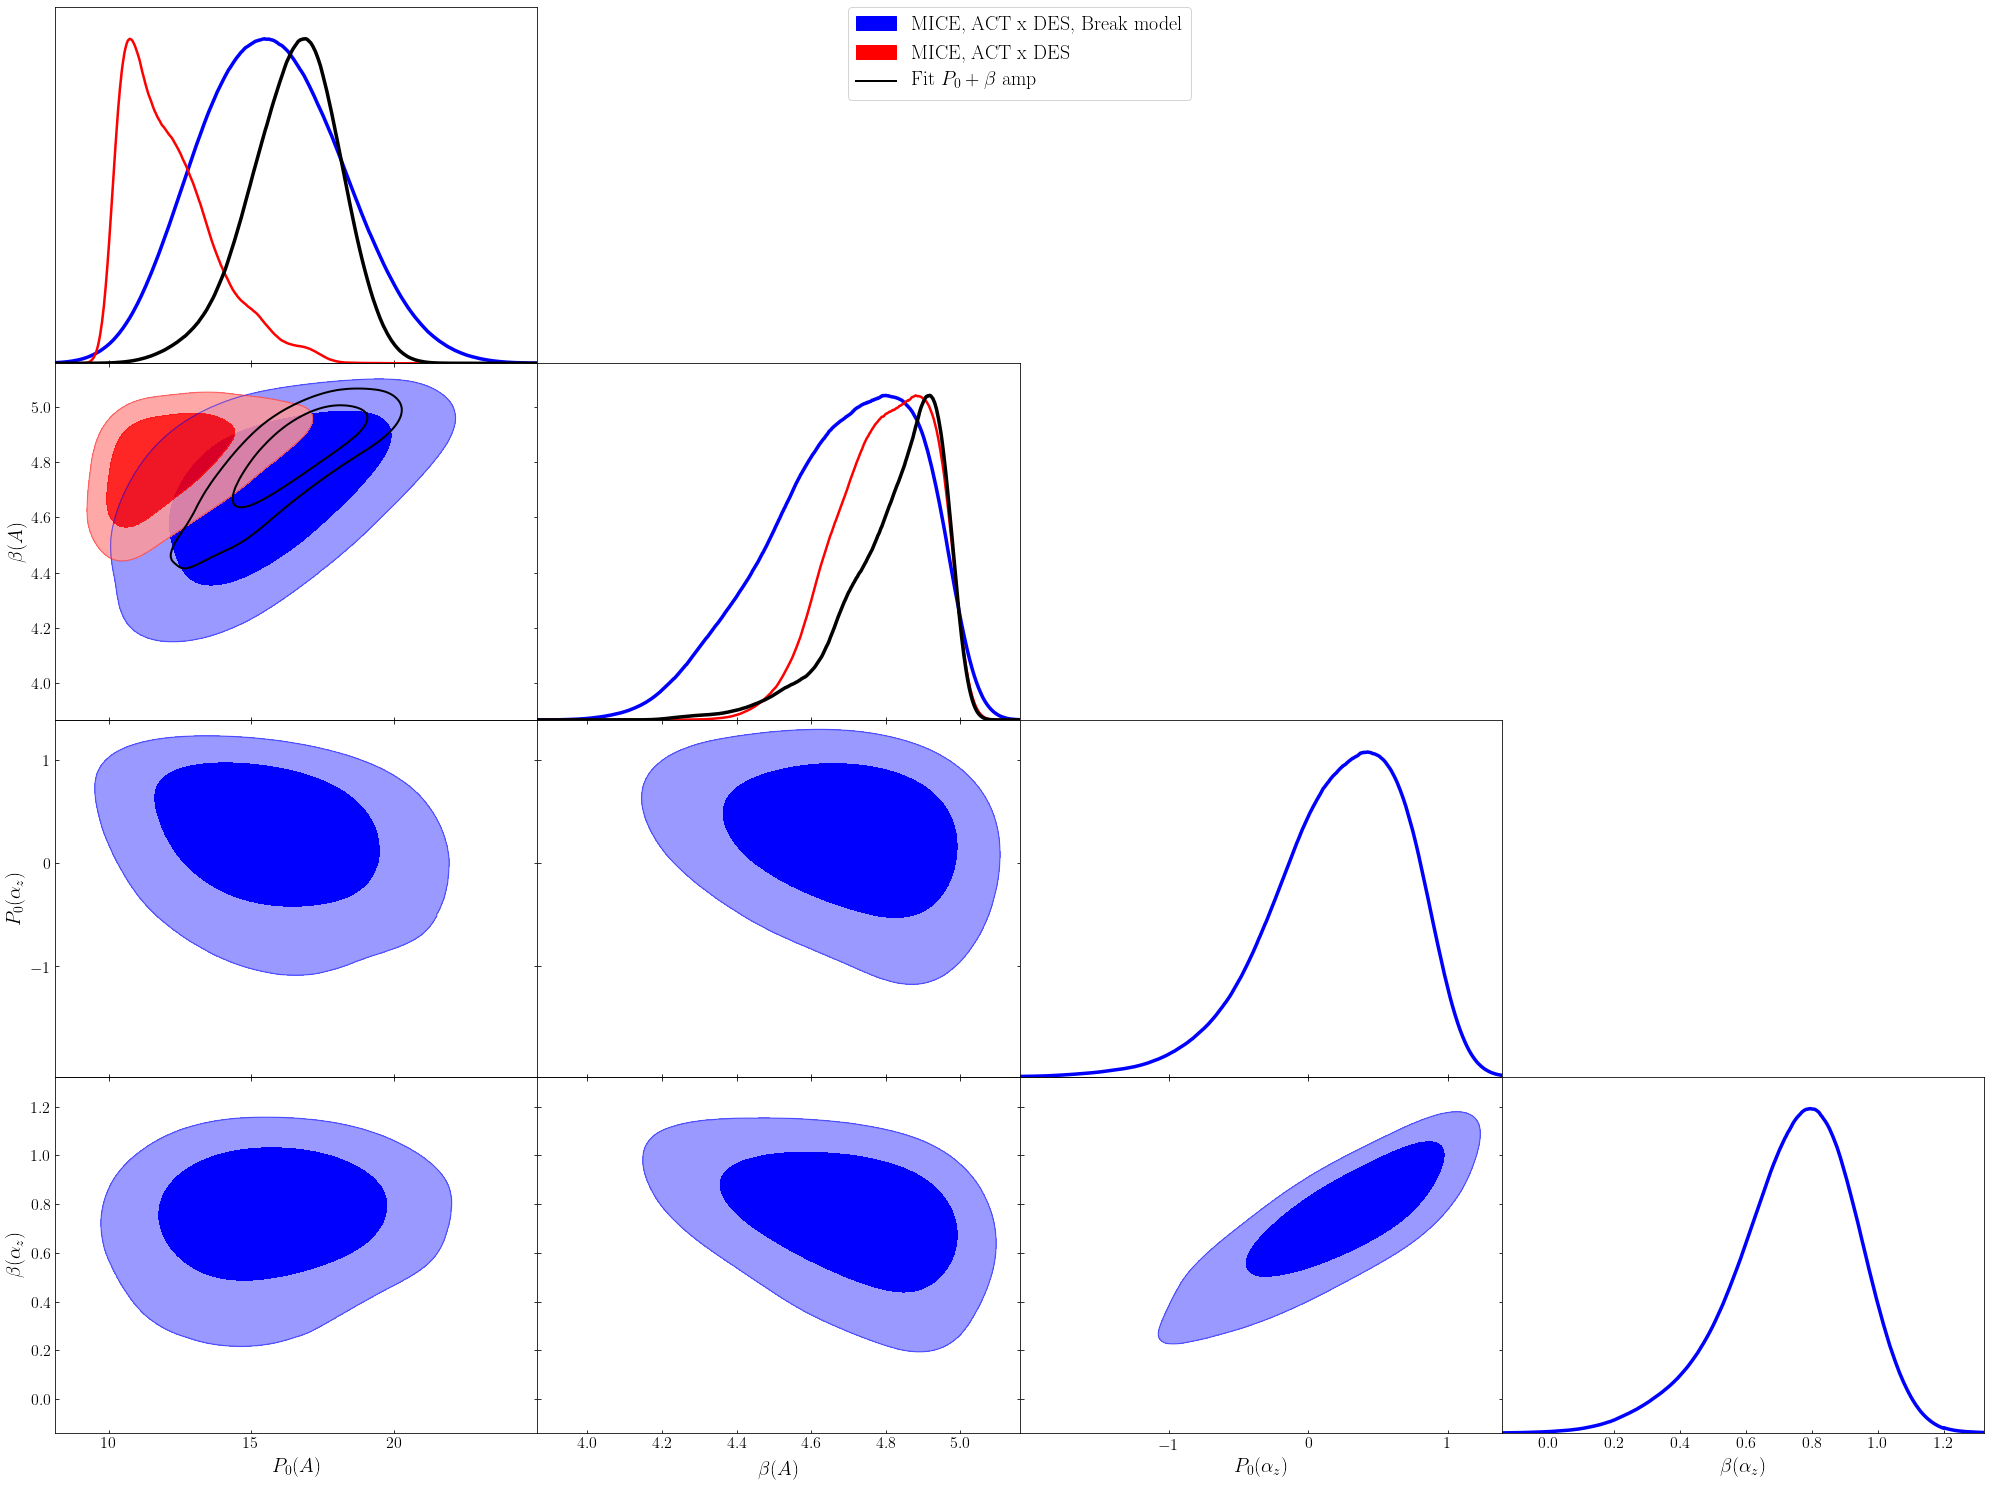

In [5]:
filename_list = [
    '/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/chains/chain_MICE_gg_gy_ACTbeam_actarea_P0az2beta.txt',
    '/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/chains/chain_MICE_gg_gy_ACTbeam_actarea_breakmodel.txt',  
    '/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/chains/chain_MICE_gg_gy_ACTbeam_actarea.txt', 
                 
#                  '/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/chains/chain_sz_shear_actxdesy3_grid_v0p4_P0beta_broken_narrow_xipximgty.txt',   
#                  '/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/chains/chain_sz_shear_planckxdesy3_grid_v0p4_P0beta_narrow_kkgtyonly_corr.txt'
]     
legend_labels = ['MICE, ACT x DES, Break model','MICE, ACT x DES','Fit ' + r'$P_0 + \beta$' + ' amp']
ext_b1b2 = [0,0,0]

all_data = []
all_samples = []


# fancy_dictionary = {'theory_yx--p0-a_m--0':r'$P_0(A)$','theory_yx--p0-alpha_z--0':r'$P_0(\alpha_z)$','theory_yx--beta-a_m--0':r'$\beta(A)$',
#                     'theory_yx--beta-alpha_z--0':r'$\beta(\alpha_z)$','theory_yx--alpha_p_high--0':r'$\alpha^{\rm high}_p$','theory_yx--alpha_p_low--0':r'$\alpha^{\rm low}_p$', 
#                    'theory_yx--logmmin_z0--0': r'$\log{(M_{min}, z_0)}$',  'theory_yx--logmmin_alpha_z--0': r'$\alpha_z(\log{(M_{min})})$',   
#                     'theory_yx--logmstar_z0--0':r'$\log{(M_{*}, z_0)}$',  'theory_yx--logmstar_alpha_z--0':r'$\alpha_z(\log{(M_{*})})$',   
#                     'theory_yx--n_z0--0' : r'$n(z_0)$', 'theory_yx--n_alpha_z--0': r'$\alpha_z(n)$', 'theory_yx--sig_logm_z0--0': r'$\sigma_{\log M}(z_0)$',    
#                     'theory_yx--sig_logm_alpha_z--0':r'$\alpha_z(\sigma{\log M})$',  'theory_yx--logm1_z0--0':r'$\log{(M_{1}, z_0)}$',   
#                     'theory_yx--logm1_alpha_z--0': r'$\alpha_z(\log{(M_{1})})$',  'theory_yx--alpha_g_z0--0': r'$\alpha_g(z_0)$',  'theory_yx--alpha_g_alpha_z--0':r'$\alpha_z(\alpha_g)$'
#                    }  

fancy_dictionary = {'theory_yx--p0-a_m--0':r'$P_0(A)$','theory_yx--p0-alpha_z--0':r'$P_0(\alpha_z)$','theory_yx--beta-a_m--0':r'$\beta(A)$',
                    'theory_yx--beta-alpha_z--0':r'$\beta(\alpha_z)$','theory_yx--alpha_p_high--0':r'$\alpha^{\rm high}_p$','theory_yx--alpha_p_low--0':r'$\alpha^{\rm low}_p$', 
                   }  




for fi in range(0,len(filename_list)):
    filename = filename_list[fi]
    nsample = get_nsample(filename)
    data = np.loadtxt(filename)[-nsample:,:]
    like_min = np.amax(data[:,-3])
    weights = np.loadtxt(filename)[-nsample:,-1]
    param_names = get_param_names(filename)
    param_names_fancy, selection = replace_fancy(np.array(param_names), fancy_dictionary)
    likef = np.loadtxt(filename)[-nsample:,-3]
    ind_max = np.where(likef == np.amax(likef))[0]
    print(data[ind_max,:])
    print((-2. * like_min))

    
    data = data[:,selection]
    param_names = param_names[selection]
    param_names_fancy = param_names_fancy
    all_data.append(data)

    samples = MCSamples(samples=data,\
                        weights=weights, \
                        names = param_names, labels = param_names_fancy)
    all_samples.append(samples)

    print("nsamp  = ", nsample)
    print("data shape = ", data.shape)
    print( "weights shape = ", weights.shape)
    print( "param names = ", param_names)
    print( "param names fancy = ", param_names_fancy)


fig_save_dir = './paper_figs/'
# pl.rc('text.latex')

# param_limits = {'$\sigma8$':[0.7, 0.9]}

g = plots.getSinglePlotter(width_inch=28)
g.settings.axes_fontsize   = 16
g.settings.lab_fontsize    = 20
g.settings.legend_fontsize = 20
g.settings.axis_marker_lw = 2.0
s8v = 0.84305 * (0.3/0.3)**0.5
marker_dict = {'cosmological_parameters--omega_m':0.3,'COSMOLOGICAL_PARAMETERS--SIGMA_8':0.84305,'cosmological_parameters--s8':s8v,'cosmological_parameters--omega_b':0.048,'cosmological_parameters--h0':0.69,'cosmological_parameters--n_s':0.97,'cosmological_parameters--w':-1.0,'pk_to_cl--b1e_bin1':1.7,'pk_to_cl--b1e_bin2':1.7,'pk_to_cl--b1e_bin3':1.7,'pk_to_cl--b1e_bin4':2.0,'pk_to_cl--b1e_bin5':2.0,'pk_to_cl--b2e_bin1':0.23,'pk_to_cl--b2e_bin2':0.23,'pk_to_cl--b2e_bin3':0.23,'pk_to_cl--b2e_bin4':0.5,'pk_to_cl--b2e_bin5':0.5}    
g.triangle_plot(all_samples, legend_labels = legend_labels, markers=marker_dict,line_args=[{'lw':2.5,'color':'blue'},{'lw':2.5,'color':'red'},{'lw':3.5,'color':'black'}],contour_lws=[3.5],  filled = [True,  True,False], contour_colors = ['blue','red','black'])  
# g.triangle_plot(all_samples, legend_labels = legend_labels, markers=marker_dict,  filled = [True,  True,True])  

# g.export(fname = 'compare_cosmo_extprior_44_NLbiasDV.pdf')









In [39]:
filename = filename_list[1]
nsample = get_nsample(filename)
data = np.loadtxt(filename)[-nsample:,:]
weights = np.loadtxt(filename)[-nsample:,-1]




In [40]:
like_min = np.amax(data[:,-3])
(-2. * like_min)/200.


In [2]:
import pickle as pk
df = pk.load(open('/global/cfs/cdirs/des/shivamp/cosmosis/ACTxDESY3/src/results/dy/dy_act_deprojects_cib_v1.0.0_wbeam_nside4096__cat_maglim_z_0.2_0.4_dojk_True_njk_180_desy3_w1.pk','rb'))   
df.keys()


dict_keys(['dytruth', 'randytruth', 'xi_dytruth_big_all', 'xi_randytruth_big_all', 'minz', 'maxz', 'do_jk', 'njk', 'ndatapoint', 'nrand', 'area_datapoint_sqdeg', 'zmean', 'Dcom_z'])

SNR ACT x DES bin 1:15.1 sigma
SNR ACT x DES bin 2:15.8 sigma
SNR ACT x DES bin 3:17.7 sigma
SNR ACT x DES bin 4:16.2 sigma
SNR ACT x DES bin 5:15.0 sigma
SNR ACT x DES bin 6:13.7 sigma


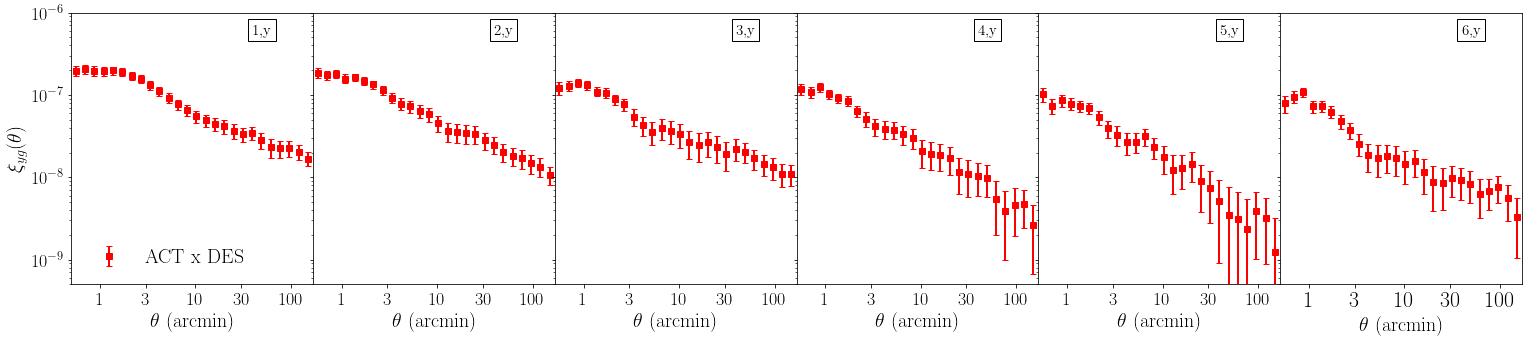

In [4]:
zmin_bins = np.array([0.2, 0.4, 0.55, 0.7, 0.85, 0.95])
zmax_bins = np.array([0.4, 0.55, 0.7, 0.85, 0.95, 1.05 ])

import pdb
import scipy.interpolate as interpolate
# plot the galaxy-y correaltion
fig, ax = pl.subplots(1,6, gridspec_kw = {'wspace':0.0, 'hspace':0.0},sharey=True,sharex=True)
fig.set_size_inches((26,5))
# fig.subplots_adjust(hspace = 0.)

pl.tick_params(axis='both', which='major', labelsize=20)
pl.tick_params(axis='both', which='minor', labelsize=20)

xmin = 0.5
xmax = 170.   
linestyles = ['-.','-','--',':','-.','-','--']
factor = 1.
markers = ['s','s','o','D','d','+']
texts_gy = [r'1,y',r'2,y',r'3,y',r'4,y',r'5,y',r'6,y']
save_dir = '/global/project/projectdirs/des/shivamp/cosmosis/ACTxDESY3/src/results/dy/'
filenames = []
# labels = ['ACT Deproj CIB','ACT No Deproj']
labels = ['ACT x DES']
colors = ['red','blue']
for j in range(len(zmin_bins)):
#     filenames.append()   
    labels.append(str(zmin_bins[j]) + ' < z < ' + str(zmax_bins[j]))
    filename1 = save_dir + 'dy_act_deprojects_cib_v1.0.0_wbeam_nside4096__cat_maglim_z_' + str(zmin_bins[j]) + '_' + str(zmax_bins[j]) + '_dojk_True_njk_180_desy3_w1.pk'
#     filename2 = save_dir + 'dy_act_deprojects_None_v1.0.0_wbeam_nside4096__cat_maglim_z_' + str(zmin_bins[j]) + '_' + str(zmax_bins[j]) + '_dojk_True_njk_180_desy3_w1.pk'
    
    for jf in range(1):
        if jf == 0:
            filename = filename1
        else:
            filename = filename2
        try:
            haloydata = pk.load(open(filename, "rb"))
        except:
            haloydata = pk.load(open(filename, "rb"),encoding='latin1')

        dytruth = haloydata['dytruth']
        randytruth = haloydata['randytruth']

        xi_dytruth = dytruth.xi - randytruth.xi

        if haloydata['do_jk']:
            njk = haloydata['njk']
            xi_dytruth_big_all = haloydata['xi_dytruth_big_all']
            xi_randytruth_big_all = haloydata['xi_randytruth_big_all']
            xi_dytruth_all= (xi_dytruth_big_all-xi_randytruth_big_all)
            xi_dytruth_mean = np.tile(np.mean(xi_dytruth_all,axis=0),(njk,1))
            xi_dytruth_sigma = np.sqrt((1.0*(njk-1.)/njk)*(np.sum(np.square(xi_dytruth_all - xi_dytruth_mean),axis=0)))
        
            xi_dytruth_all= (xi_dytruth_big_all-xi_randytruth_big_all)
            xi_dytruth_mean = np.tile(np.mean(xi_dytruth_all,axis=0),(njk,1))
            xi_dytruth_sigma = np.sqrt((1.0*(njk-1)/njk)*(np.sum(np.square(xi_dytruth_all - xi_dytruth_mean),axis=0)))
            xi_cov = (1.0*(njk-1)/njk)* np.dot((xi_dytruth_all - xi_dytruth_mean).T , (xi_dytruth_all - xi_dytruth_mean))
        
            xi_invcov = np.linalg.inv(xi_cov)
            xi_snr = np.sqrt(np.dot(  np.array([dytruth.xi]), np.dot(xi_invcov, np.array([dytruth.xi]).T)  ))
        
            print('SNR ' + str(labels[jf]) + ' bin ' + str(j+1) + ':' + str(np.round( xi_snr[0][0], 1)) + r' sigma')



        ax[j].errorbar(factor*np.exp(dytruth.logr)*1.05**(jf), xi_dytruth, yerr=xi_dytruth_sigma, label = labels[jf], linestyle='None', capsize=3, lw = 2,marker=markers[jf], color = colors[jf])  
    
    ax[j].text( 0.75, 0.96,texts_gy[j], verticalalignment='top', horizontalalignment='left', transform=ax[j].transAxes, fontsize=15, bbox=dict(facecolor='white', edgecolor='black'))    
    ax[j].set_xscale('log')
    ax[j].set_yscale('log')
    ax[j].set_xlabel(r'$\theta$ (arcmin)', size = 20)
    ticks  = np.array([1,3,10,30,100])
    labels_bottom = ticks
    ax[j].set_xticks(ticks)
    ax[j].set_xticklabels(labels_bottom,  fontsize=18)


    if j == 0:
        ax[j].set_ylabel(r'$\xi_{yg}(\theta)$', size = 20)
        ax[j].set_ylim((5.0e-10,10.0e-7))
        ax[j].set_yscale('log')
#         ax[j].tick_params(axis='y', labelsize=22)

    ax[j].set_xlim((xmin, xmax))
# ax.set_title(r'ACT v1 x Maglim Y3', size=18 )

ax[0].legend(fontsize = 20, frameon = False, loc = 'lower left')

pl.tick_params(axis='both', which='major', labelsize=22)
pl.tick_params(axis='both', which='minor', labelsize=22)


# fig.savefig('actxdesy3_maglim_redmagic_comp_v1.pdf', format = 'pdf')





No handles with labels found to put in legend.


SNR ACT x DES bin 1:4.4 sigma


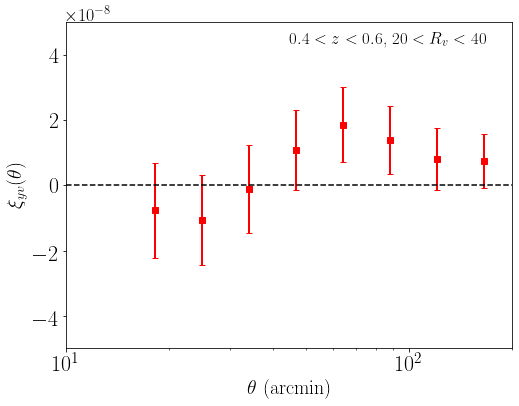

In [22]:
zmin_bins = np.array([0.2, 0.4, 0.55, 0.7, 0.85, 0.95])
zmax_bins = np.array([0.4, 0.55, 0.7, 0.85, 0.95, 1.05 ])

import pdb
import scipy.interpolate as interpolate
# plot the galaxy-y correaltion
fig, ax = pl.subplots(1,1, gridspec_kw = {'wspace':0.0, 'hspace':0.0},sharey=True,sharex=True)
fig.set_size_inches((8,6))
# fig.subplots_adjust(hspace = 0.)

pl.tick_params(axis='both', which='major', labelsize=20)
pl.tick_params(axis='both', which='minor', labelsize=20)

xmin = 0.5
xmax = 170.   
linestyles = ['-.','-','--',':','-.','-','--']
factor = 1.
markers = ['s','s','o','D','d','+']
texts_gy = [r'1,y',r'2,y',r'3,y',r'4,y',r'5,y',r'6,y']
save_dir = '/global/project/projectdirs/des/shivamp/nl_cosmosis/cosmosis//ACTxDESY3/src/results/dy/'
filenames = []
# labels = ['ACT Deproj CIB','ACT No Deproj']
labels = ['ACT x DES']
colors = ['red','blue']
for j in range(1):
#     filenames.append()   
    labels.append(str(zmin_bins[j]) + ' < z < ' + str(zmax_bins[j]))
#    filename1 = save_dir + 'dy_planck_fwhm_10arcmin_nside2048__cat_void_z_0.5_0.6_R_20.0_30.0_dojk_True_njk_100_desy3_w1.pk'
#    text_v = r'$0.5 < z < 0.6$, ' + '$20 < R_v < 30$'
#     filename1 = save_dir + 'dy_planck_fwhm_10arcmin_nside2048__cat_void_z_0.4_0.5_R_20.0_30.0_dojk_True_njk_100_desy3_w1.pk'
#     text_v = r'$0.4 < z < 0.5$, ' + '$20 < R_v < 30$'

    filename1 = save_dir + 'dy_planck_fwhm_10arcmin_nside2048__cat_void_z_0.4_0.6_R_20.0_40.0_dojk_True_njk_100_desy3_w1.pk'
    text_v = r'$0.4 < z < 0.6$, ' + '$20 < R_v < 40$'

    
    #     filename2 = save_dir + 'dy_act_deprojects_None_v1.0.0_wbeam_nside4096__cat_maglim_z_' + str(zmin_bins[j]) + '_' + str(zmax_bins[j]) + '_dojk_True_njk_180_desy3_w1.pk'
    
    for jf in range(1):
        if jf == 0:
            filename = filename1
        else:
            filename = filename2
        try:
            haloydata = pk.load(open(filename, "rb"))
        except:
            haloydata = pk.load(open(filename, "rb"),encoding='latin1')

        dytruth = haloydata['dytruth']
        randytruth = haloydata['randytruth']

        xi_dytruth = dytruth.xi - randytruth.xi

        if haloydata['do_jk']:
            njk = haloydata['njk']
            xi_dytruth_big_all = haloydata['xi_dytruth_big_all']
            xi_randytruth_big_all = haloydata['xi_randytruth_big_all']
            xi_dytruth_all= (xi_dytruth_big_all-xi_randytruth_big_all)
            xi_dytruth_mean = np.tile(np.mean(xi_dytruth_all,axis=0),(njk,1))
            xi_dytruth_sigma = np.sqrt((1.0*(njk-1.)/njk)*(np.sum(np.square(xi_dytruth_all - xi_dytruth_mean),axis=0)))
        
            xi_dytruth_all= (xi_dytruth_big_all-xi_randytruth_big_all)
            xi_dytruth_mean = np.tile(np.mean(xi_dytruth_all,axis=0),(njk,1))
            xi_dytruth_sigma = np.sqrt((1.0*(njk-1)/njk)*(np.sum(np.square(xi_dytruth_all - xi_dytruth_mean),axis=0)))
            xi_cov = (1.0*(njk-1)/njk)* np.dot((xi_dytruth_all - xi_dytruth_mean).T , (xi_dytruth_all - xi_dytruth_mean))
        
            xi_invcov = np.linalg.inv(xi_cov)
            xi_snr = np.sqrt(np.dot(  np.array([dytruth.xi]), np.dot(xi_invcov, np.array([dytruth.xi]).T)  ))
        
            print('SNR ' + str(labels[jf]) + ' bin ' + str(j+1) + ':' + str(np.round( xi_snr[0][0], 1)) + r' sigma')



        ax.errorbar(factor*np.exp(dytruth.logr)*1.05**(jf), xi_dytruth, yerr=xi_dytruth_sigma, linestyle='None', capsize=3, lw = 2,marker=markers[jf], color = colors[jf])  
    
    ax.text( 0.5, 0.96,text_v, verticalalignment='top', horizontalalignment='left', transform=ax.transAxes, fontsize=17)    
    ax.set_xscale('log')
#     ax.set_yscale('log')
    ax.set_xlabel(r'$\theta$ (arcmin)', size = 20)
    ax.axhline(0.0,ls = '--',color='k')
#     ticks  = np.array([1,3,10,30,100])
#     labels_bottom = ticks
#     ax.set_xticks(ticks)
#     ax.set_xticklabels(labels_bottom,  fontsize=18)


    if j == 0:
        ax.set_ylabel(r'$\xi_{yv}(\theta)$', size = 20)
        ax.set_ylim((-5e-8,5e-8))
        ax.set_xlim(10,200)
#         ax.set_yscale('log')
#         ax[j].tick_params(axis='y', labelsize=22)

#     ax.set_xlim((xmin, xmax))
# ax.set_title(r'ACT v1 x Maglim Y3', size=18 )

ax.legend(fontsize = 20, frameon = False, loc = 'lower left')

pl.tick_params(axis='both', which='major', labelsize=22)
pl.tick_params(axis='both', which='minor', labelsize=22)


# fig.savefig('actxdesy3_maglim_redmagic_comp_v1.pdf', format = 'pdf')









In [5]:
xi_dytruth


array([ 2.43268344e-07,  5.12526120e-08, -3.47542385e-08, -2.05467889e-08,
       -9.76481121e-09, -1.24737950e-09, -1.19331729e-08, -6.81741925e-09,
       -2.04718353e-09, -6.27856271e-09, -2.84609675e-08, -8.53403370e-09,
        8.36611085e-09,  1.36952419e-10,  3.25286298e-09])

In [6]:
xi_dytruth_sigma


array([2.05140632e-07, 1.35430326e-07, 7.51667603e-08, 5.13868930e-08,
       4.50322091e-08, 3.32577743e-08, 3.00107605e-08, 2.56096118e-08,
       2.11130608e-08, 1.68582947e-08, 1.34536156e-08, 1.25794811e-08,
       1.06588403e-08, 8.50046751e-09, 5.95594539e-09])

In [2]:
df = np.load('/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/results/testuk.npz')   


kv, ukv = df['k'], df['uk']



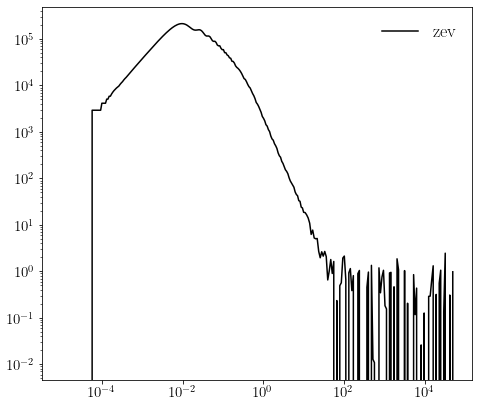

In [4]:

fig, ax = pl.subplots(1,1, figsize = (7,6))
# ind = 30
ax.errorbar(kv, ukv,label=r'zev',ls='-',marker='',elinewidth=2.0,color='black')
ax.set_xscale('log')
ax.set_yscale('log')
ax.tick_params(axis='both', which='major', labelsize=15)
ax.tick_params(axis='both', which='minor', labelsize=15)
ax.legend(fontsize = 18, frameon = False)
pl.tight_layout()





In [5]:
df = np.load('/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/results/test_rhoM.npz')   
M, z, rv, rhoM = df['M'], df['z'], df['r'], df['rho']




In [9]:
rhoM 


array([[[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        ...,
        [ 1.22078372e+25,  1.20296155e+25,  1.18110043e+25, ...,
          2.32115507e+12, -2.06619728e+12,  1.83919010e+12],
        [ 1.43624690e+25,  1.41527918e+25,  1.38955967e+25, ...,
          2.73082914e+12, -2.43087237e+12,  2.16379939e+12],
        [ 1.68972671e+25,  1.66505845e+25,  1.63479976e+25, ...,
          3.21278692e+12, -2.85989147e+12,  2.54568339e+12]],

       [[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e

In [11]:
rhoM[,:,:]

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       ...,
       [ 1.22078320e+25,  1.20296103e+25,  1.18109993e+25, ...,
         2.32115401e+12, -2.06619633e+12,  1.83918926e+12],
       [ 1.43624748e+25,  1.41527975e+25,  1.38956023e+25, ...,
         2.73083038e+12, -2.43087347e+12,  2.16380037e+12],
       [ 1.68972544e+25,  1.66505720e+25,  1.63479853e+25, ...,
         3.21278430e+12, -2.85988913e+12,  2.54568131e+12]])

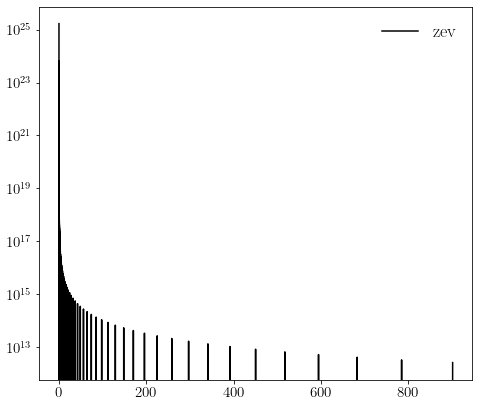

In [14]:

fig, ax = pl.subplots(1,1, figsize = (7,6))
# ind = 30
ax.errorbar(rv, rhoM[-1,-1,:],label=r'zev',ls='-',marker='',elinewidth=2.0,color='black')
# ax.set_xscale('log')
ax.set_yscale('log')
ax.tick_params(axis='both', which='major', labelsize=15)
ax.tick_params(axis='both', which='minor', labelsize=15)
ax.legend(fontsize = 18, frameon = False)
pl.tight_layout()




